[*********************100%***********************]  10 of 10 completed


                Close
Date                 
2019-01-02  37.667179
2019-01-03  33.915253
2019-01-04  35.363068
2019-01-07  35.284359
2019-01-08  35.956997
                  Close
Date                   
2019-01-02  6665.939941
2019-01-03  6463.500000
2019-01-04  6738.859863
2019-01-07  6823.470215
2019-01-08  6897.000000


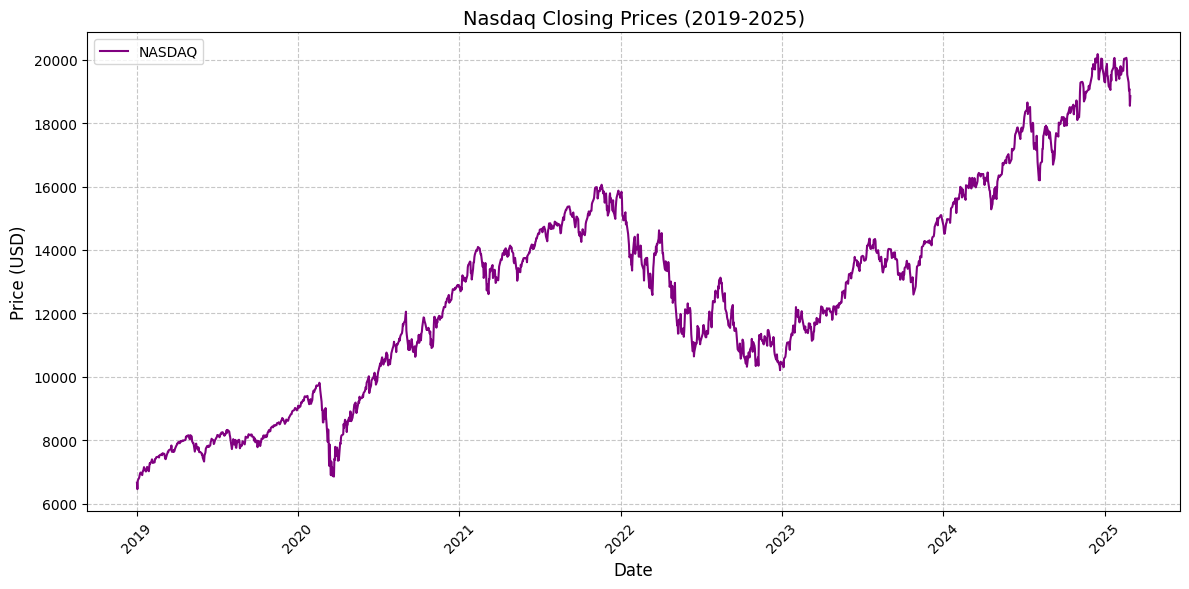

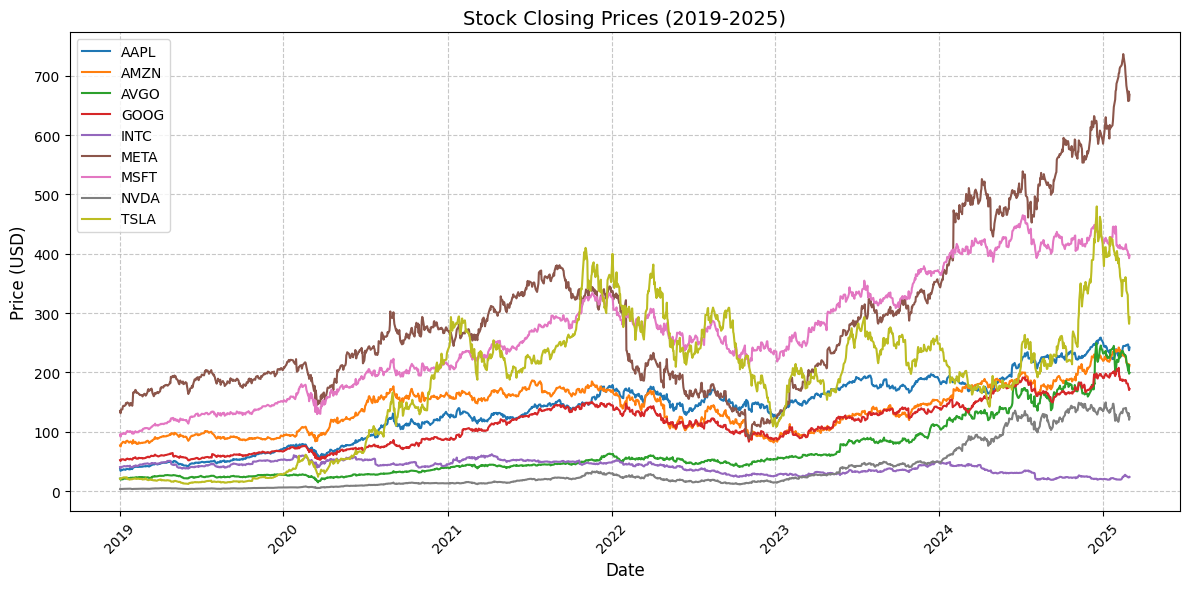

Stock data has been saved to 'stock_prices_2019_2025.xlsx'


In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of stocks and Nasdaq index
stocks = ['AAPL', 'AMZN', 'AVGO', 'GOOG', 'INTC', 'META', 'MSFT', 'NVDA', 'TSLA', '^IXIC']
start_date = '2019-01-01'
end_date = '2025-03-01'

# Fetch all data at once (including Nasdaq)
data = yf.download(stocks, start=start_date, end=end_date, interval='1d')

# Create a dictionary of DataFrames for individual stocks/index
close_dfs = {stock: pd.DataFrame(data['Close'][stock]).rename(columns={stock: 'Close'}) 
            for stock in stocks}

# Display one to verify
print(close_dfs['AAPL'].head())
print(close_dfs['^IXIC'].head())  # Verify Nasdaq data

# Plot 1: Only Nasdaq
plt.figure(figsize=(12, 6))
plt.plot(close_dfs['^IXIC'].index, close_dfs['^IXIC']['Close'], label='NASDAQ', color='purple')
plt.title('Nasdaq Closing Prices (2019-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: All stocks except Nasdaq
stock_list = [stock for stock in stocks if stock != '^IXIC']  # Exclude Nasdaq
plt.figure(figsize=(12, 6))
for stock in stock_list:
    plt.plot(close_dfs[stock].index, close_dfs[stock]['Close'], label=stock)
plt.title('Stock Closing Prices (2019-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Combine all closing prices into one DataFrame
all_close = data['Close'].rename(columns={'^IXIC': 'NASDAQ'})  # Rename ^IXIC to NASDAQ for clarity

# Define the Excel file name
excel_file = 'stock_prices_2019_2025.xlsx'

# Save to Excel in a single sheet
with pd.ExcelWriter(excel_file, engine='xlsxwriter', date_format='yyyy-mm-dd') as writer:
    # Format the index (dates) to 'YYYY-MM-DD' before saving
    all_close.index = all_close.index.strftime('%Y-%m-%d')
    
    # Write all data to a single sheet
    all_close.to_excel(writer, sheet_name='Stock_Data', index=True)
    
    # Get the worksheet
    worksheet = writer.sheets['Stock_Data']
    
    # Set column widths
    worksheet.set_column('A:A', 15)  # Date column
    worksheet.set_column('B:K', 15)  # Stock and Nasdaq price columns (10 columns total)
    
    # Add header format
    header_format = writer.book.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'top',
        'fg_color': '#D7E4BC',
        'border': 1
    })
    
    # Apply header format to first row
    worksheet.write('A1', 'Date', header_format)
    for col_num, value in enumerate(all_close.columns.values):
        worksheet.write(0, col_num + 1, value, header_format)

# Print confirmation
print(f"Stock data has been saved to '{excel_file}'")